In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
netflix_df = pd.read_csv('netflix_titles.csv')

In [3]:
# The show_id column datatype states object, would like to change to integer
# using vectorised str methods to slice each string entry by removing the 's' in
netflix_df['show_id'] = netflix_df['show_id'].str.replace('s','').astype(int)

In [4]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
netflix_df.dtypes # to check the data type of eacg column

show_id          int32
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [6]:
netflix_df.shape # to find the number of rows and columns of the dataset


(8807, 12)

In [7]:
netflix_df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

#### Observations:
* Only release_year is of Integer type.

* Netflix have only two types of content

* Netflix is covered in 748 countries around the world

#### Identify Missing Data

In [8]:
# To Identify missing values
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [9]:
# To represent the missing values in percentage to have a clearer picture of the missing data
for column in netflix_df.columns:
    percent = netflix_df[column].isnull().mean()
    print(f'{column}: {round(percent*100, 2)}%')

show_id: 0.0%
type: 0.0%
title: 0.0%
director: 29.91%
cast: 9.37%
country: 9.44%
date_added: 0.11%
release_year: 0.0%
rating: 0.05%
duration: 0.03%
listed_in: 0.0%
description: 0.0%


#### Dealing with Missing Data

##### Using Mean, Median and Mode to replace empty values
* The mean and median are used to replace Numeric data, while the mode replaces Categorical data

In [10]:
# to remove the 'director' column from the dataset as it contains a very high percentage of null values
# drop column, axis to specify column
netflix_df.drop('director', axis=1, inplace=True)
# to remove the rows with NaN from the 'cast' and 'country columns
netflix_df.dropna(subset=['cast','country','date_added'], inplace=True)
# the rating and duration columns contain 0.03% of missing data.
mode = ''.join(netflix_df['rating'].mode())
netflix_df['rating'].fillna(mode, inplace=True)

mode = ''.join(netflix_df['duration'].mode())
netflix_df['duration'].fillna(mode, inplace=True)

netflix_df.isnull().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [11]:
# globally set the graph style and font size 
sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)  
plt.rc('axes', labelsize=14)    
plt.rc('xtick', labelsize=13)    
plt.rc('ytick', labelsize=13)    
plt.rc('legend', fontsize=13)    
plt.rc('font', size=13)  # controls default text sizes

### Exploring The Dataset to Develop Insights 
    [1] Does Netflix have more focus on TV Shows than Movies in recent years?

In [12]:
#focus_10 = netflix_df[netflix_df['type'].isin(['Movie', 'TV Show'])]
#focus_10 = focus_10.groupby(['release_year', 'type'], as_index=False).count().tail(20)

focus_10 = netflix_df[['type', 'release_year']] # creating new df
focus_10 = focus_10.groupby(['release_year','type']).size().reset_index(name='Total Content')
focus_10 = focus_10[focus_10['release_year']>=2012] # over 10 years
lineplot = focus_10.pivot(index='type', columns='release_year' ,values='Total Content').T
lineplot.reset_index(inplace=True)
lineplot = lineplot.set_index('release_year')
lineplot


type,Movie,TV Show
release_year,,
2012,162,49
2013,196,54
2014,237,73
2015,346,129
2016,574,177
2017,650,213
2018,653,282
2019,513,309
2020,417,327


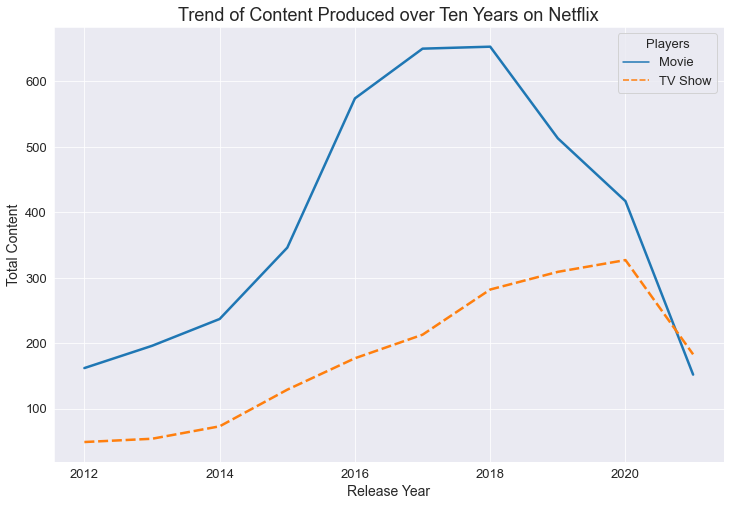

In [13]:
plt.figure(figsize=(12, 8))
ax = sns.lineplot(data=lineplot, linewidth=2.5)
ax.set(xlabel='Release Year', ylabel='Total Content', title='Trend of Content Produced over Ten Years on Netflix')
ax.legend(title='Players', title_fontsize = 13)
plt.show()

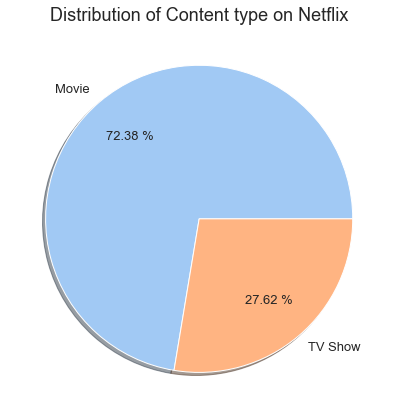

In [14]:
#Grouping based on type
types = netflix_df.groupby(['type']).size().reset_index(name='Counts')
colors = sns.color_palette('pastel')
plt.figure(figsize=(7, 6), tight_layout=True)
plt.pie(types['Counts'],labels= types['type'], autopct='%1.2f %%', pctdistance=.7, colors=colors, shadow=True)
plt.title('Distribution of Content type on Netflix', weight='light')
plt.show()

#### Observations:
* Netflix have more Movies than TV Shows

* Netflix have focused on Movies in the last ten years, although they uploaded more TV Shows in the last couple years 

    [2] How many TV Shows and Movies are added Per Month and Per Year?

In [15]:
# Adding new columns to separate months and years under date_added column
netflix_df['year_added'] = netflix_df['date_added'].apply(lambda x : x.split(',')[-1])
netflix_df['year_added'] = netflix_df['year_added'].apply(int)

netflix_df['month_added'] = netflix_df['date_added'].apply(lambda x : x.split()[0])

In [16]:
Per = netflix_df.copy()
Per_Month = Per[['month_added', 'type']].value_counts()
Per_Month = Per_Month.reset_index(level= 1, name='Counts')
Per_Month = Per_Month.loc[['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
                           'October', 'November', 'December']]


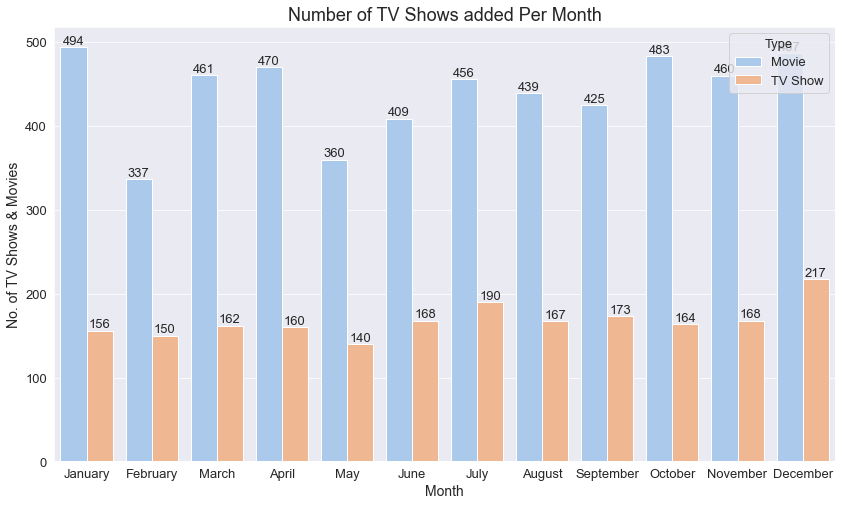

In [17]:
plt.figure(figsize=(14, 8))
ax = sns.barplot(x= Per_Month.index, y= Per_Month['Counts'], hue= Per_Month['type'], palette='pastel')

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

ax.set(title='Number of TV Shows added Per Month'  ,xlabel='Month', ylabel='No. of TV Shows & Movies')
ax.legend(title='Type', title_fontsize='13', loc='upper right')
plt.show()

In [18]:
Per_Year = Per[['year_added', 'type']].value_counts().sort_index()
Per_Year = Per_Year.reset_index(level= 1, name='Counts')


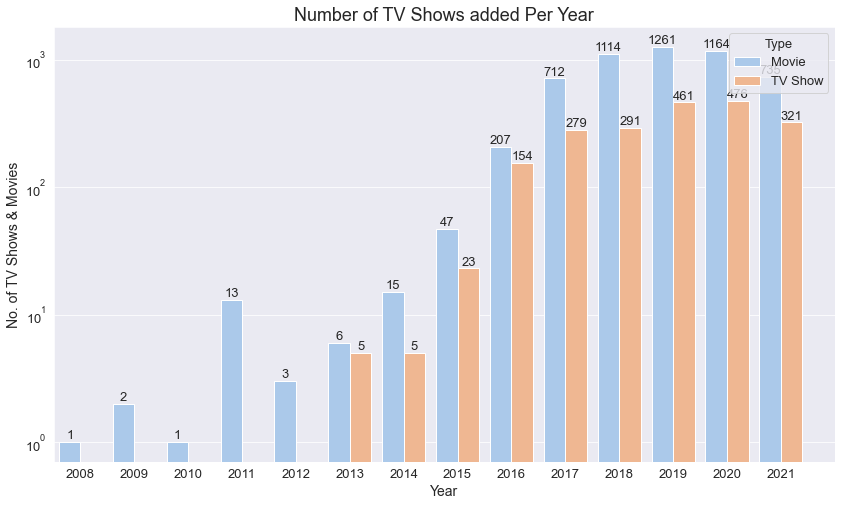

In [19]:
plt.figure(figsize=(14, 8))
ax = sns.barplot(x= Per_Year.index, y= Per_Year['Counts'], hue= Per_Year['type'], palette='pastel')

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

ax.set_yscale('log')
ax.set_xlim(-0.5, 14)

ax.set(title='Number of TV Shows added Per Year'  ,xlabel='Year', ylabel='No. of TV Shows & Movies')
ax.legend(title='Type', title_fontsize='13', loc='upper right')
plt.show()

#### Observations:
* Most Movies were added in the Year 2019

* Most Movies were added in the Month of January

* Most TV Shows were added in the Month os December

* In the year 2016, the rate of uploading increased by 5 times



    [3] What is the Distribution of Content Rating on Netflix? 

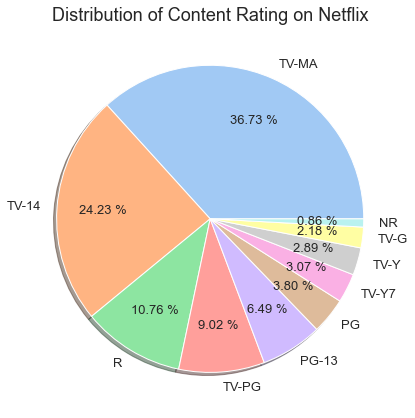

In [20]:
#Grouping based on rating
ratings = netflix_df.groupby(['rating']).size().reset_index(name='counts')
ratings = ratings.sort_values('counts', ascending=False)[['rating', 'counts']]
colors = sns.color_palette('pastel')
plt.figure(figsize=(10, 6), tight_layout=True)
plt.pie(ratings[:10]['counts'],labels= ratings[:10]['rating'], autopct='%1.2f %%', pctdistance=.7, colors=colors, shadow=True)
plt.title('Distribution of Content Rating on Netflix', weight='light')
plt.show()

    [4] Which Movies and TV Shows have the longest duration?

In [21]:
Per = netflix_df.copy()
Per.duration = Per.duration.apply(lambda x :int(x.split()[0]))
movie = Per[Per.type == 'Movie']
tv_show = Per[Per.type == 'TV Show']

movie_df = movie.sort_values(by = 'duration', ascending=False)[['title', 'duration']].head(10)

tv_show_df = tv_show.sort_values(by = 'duration', ascending=False)[['title', 'duration']].head(10)


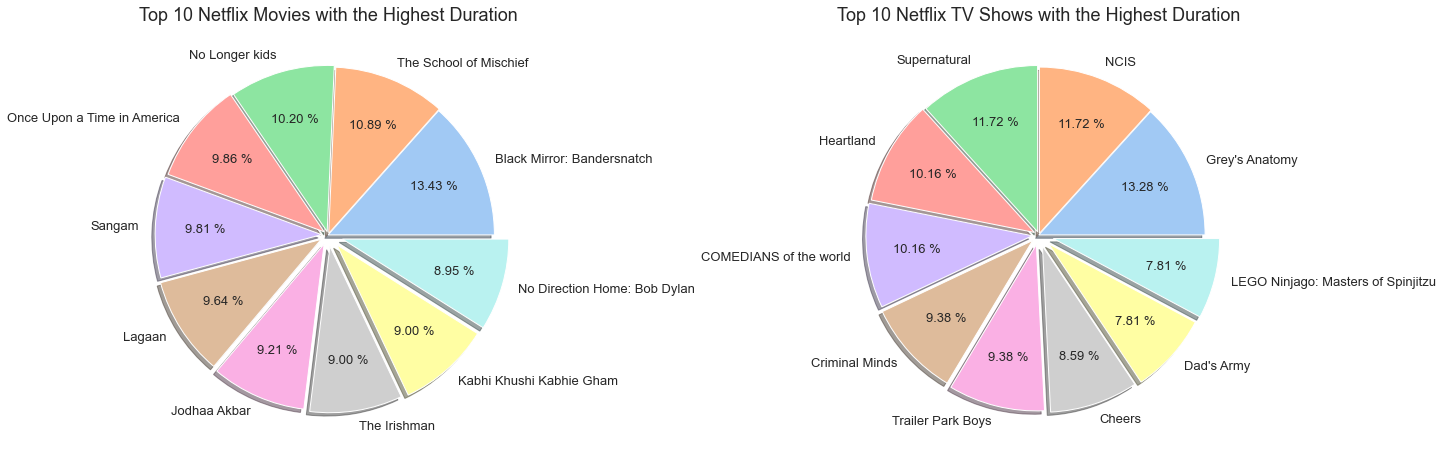

In [22]:
#subplots
fig, ax = plt.subplots(1,2, figsize=(20, 10), tight_layout=True)
colors = sns.color_palette('pastel')

explode_list1 = [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]
ax[0].pie(movie_df.duration,labels= movie_df.title, autopct='%1.2f %%', explode=explode_list1, pctdistance=.7, colors=colors, shadow=True)
ax[0].set_title('Top 10 Netflix Movies with the Highest Duration', weight='light')

explode_list1 = [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]
ax[1].pie(tv_show_df.duration,labels= tv_show_df.title, autopct='%1.2f %%', explode=explode_list1, pctdistance=.7, colors=colors, shadow=True)
ax[1].set_title('Top 10 Netflix TV Shows with the Highest Duration', weight='light')
plt.show()

    [5] The Top Actors on Netflix?

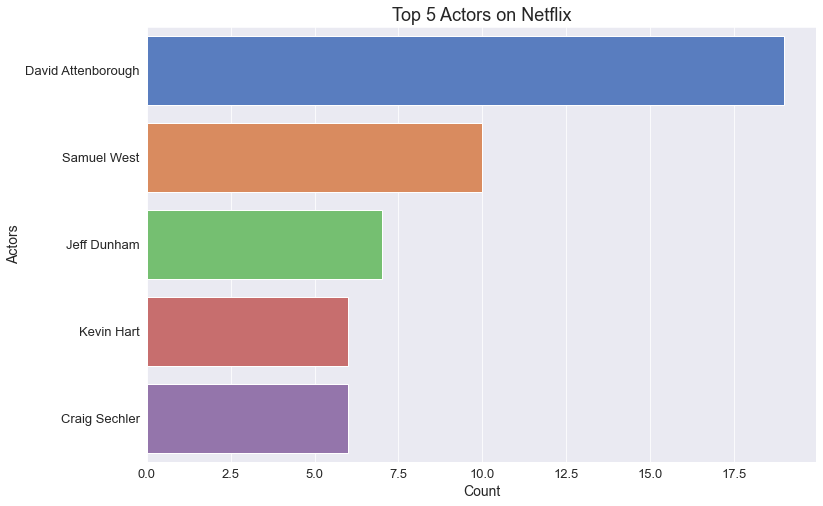

In [23]:
Per = netflix_df.copy()
actors= Per.groupby(['cast']).size().reset_index(name='count')
actors=actors.sort_values(by=['count'],ascending=False)

plt.figure(figsize=(12,8))
ax = sns.barplot(x= actors['count'].head(5), y= actors['cast'].head(5), palette='muted', ci=None)
ax.set(title='Top 5 Actors on Netflix'  ,xlabel='Count', ylabel='Actors')
plt.show()



    [6] Coutries with the most content uploaded on Netflix?

In [24]:
Per = netflix_df.copy()
Country = Per.value_counts(subset=['country','type']).reset_index(name='count')
Country_df = pd.DataFrame(Country)
mov = Country_df[Country_df.type.str.contains('Movie')].head(5)
tv_s = Country_df[Country_df.type.str.contains('TV Show')].head(5)



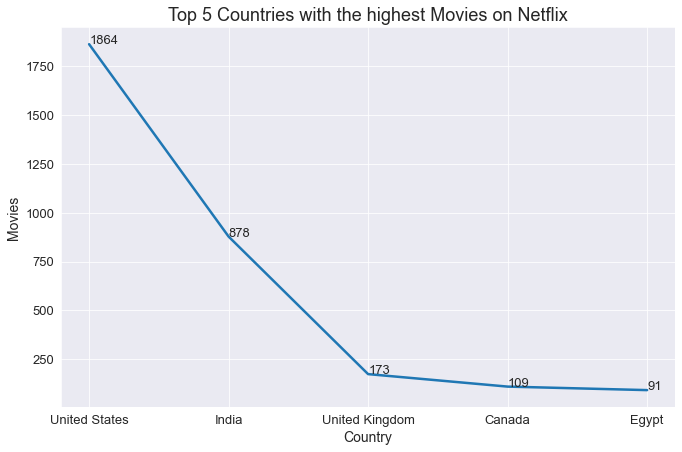

In [25]:
plt.figure(figsize=(11,7))
ax = sns.lineplot(x='country', y='count', data=mov, err_style='bars', linewidth= 2.5)

# To write the values on the plot
for  x, y in mov[['country','count']].values:
    ax.text(x,y,y)
ax.set(xlabel='Country', ylabel='Movies', title='Top 5 Countries with the highest Movies on Netflix')
plt.show()

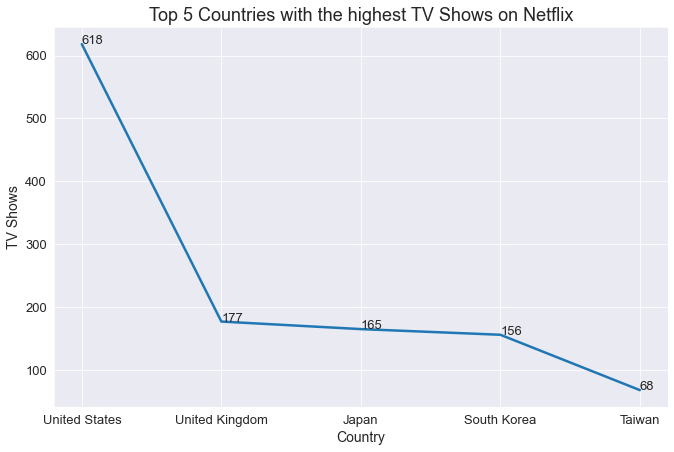

In [26]:
plt.figure(figsize=(11,7))
ax = sns.lineplot(x='country', y='count', data=tv_s, linewidth= 2.5)

# To write the values on the plot
for  x, y in tv_s[['country','count']].values:
    ax.text(x,y,y)
ax.set(xlabel='Country', ylabel='TV Shows', title='Top 5 Countries with the highest TV Shows on Netflix')
plt.show()

In [27]:
frames = [mov, tv_s]
lineplot = pd.concat(frames)[['country', 'type', 'count']]
list_countries = ['United States', 'United Kingdom', 'Japan', 'Spain', 'India']
lineplot = lineplot[lineplot['country'].isin(list_countries)]
lineplot = lineplot.pivot(index='type', columns='country' ,values='count').T
lineplot.reset_index(inplace=True)
lineplot = lineplot.set_index('country')

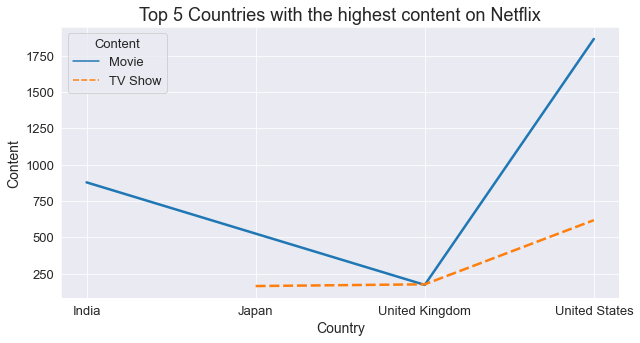

In [28]:
plt.figure(figsize=(10, 5))
ax = sns.lineplot(data=lineplot, linewidth=2.5)
ax.set(xlabel='Country', ylabel='Content', title='Top 5 Countries with the highest content on Netflix')
ax.legend(title='Content', title_fontsize = 13)
plt.show()

